# Projet Titanic

# 1.Importation des librairies

On commence par importer des librairies nécessaire pour notre projet

In [41]:
#Pour la gestion des données
import numpy as np
import pandas as pd


#Pour visualiser les données
import matplotlib.pyplot as plt
import seaborn as sns


#Pour définir le modèle de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold




# 2.Importation et lecture des données 

On importe et on fait la lecture de nos données téléchargées depuis le site dont le lien est indiqué sur le Rapport.

In [42]:
train = pd.read_csv("A:/Projet_IAS/titanic/train.csv")
test = pd.read_csv("A:/Projet_IAS/titanic/test.csv")

In [4]:
#On regarde les 5 premières lignes de Dataset d'entrainement 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#On regarde les 5 premières lignes de Dataset test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Dimension de Dataset train:", train.shape)
print("Dimension de Dataset test:", test.shape)

Dimension de Dataset train: (891, 12)
Dimension de Dataset test: (418, 11)


Remarque: Le Dataset d'entrainement contient 12 attributs alors que celui de test 11. Dans le Dataset test il manque l'attribut           Survived. Cela du au fait que nous allons entrainer notre modèle sur le Dataset Train et faire la prédiction sur 
          Dataset Test.

# 3.Description de données

On décrit ici la description de chaque attribut en détail (y compris les types)

- Passengerid (type : int) : Numéro d'identification de passager
- Survived (type : int) : Le passager a survecu ou non? 0 = le passager est non survecu, 1 = le passager est survecu
- Pclass (type : int) : Classe de voyage. 1 = Première classe, 2 = Seconde classe, 3 = Troisième classe
- Name (type : objet) : Le nom du passager
- Sex (type : objet) : Le sexe du passager. male = homme, female = femme
- Age (type : float) : L'age du passager.
- SibSp (type : int) : Le nombre de frère/soeur/conjoint
- Parch (type : int) : Le nombre de parents-enfants
- Ticket (type : objet) : Le numéro du ticket
- Fare (type : float) : Le tarif du ticket
- Cabin (type : objet) : Le numéro du cabine
- Embarked (type : objet) : La ville où le passager a monté au bord du navire. C=Cherbourg, Q=Queenstown, S=Southampton

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4.Analyse et Visualisation des données


Dans cette partie nous allons analyser, visualiser, nettoyer et extraire les données utiles.

### 4.1 Les valeurs manquantes.

Avant d'analyser et modéliser nos données on va d'abord voir s'il existe des valeurs manquantes et si c'est le cas on va ensuite les visualiser

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

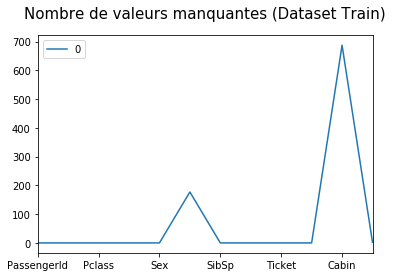

In [8]:
#Le nombre de valeurs manquantes et visualisation pour Dataset train
pd.DataFrame(train.isnull().sum()).plot.line().set_title("Nombre de valeurs manquantes (Dataset Train)", size = 15, y = 1.05)
train.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

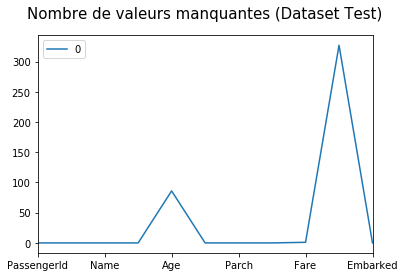

In [9]:
#Le nombre de valeurs manquantes et visualisation pour Dataset test
pd.DataFrame(test.isnull().sum()).plot.line().set_title("Nombre de valeurs manquantes (Dataset Test)", size = 15, y = 1.05)
test.isnull().sum().sort_values(ascending = False)

In [10]:
#Statistique de données pour Dataset train
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Statistique de données pour Dataset test
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 4.2 Visualisation

#### - L'attribut Survived

- Parmi 891 passagers 549 personnes ne sont pas survecus ce qui représente plus de 60% de la population.

In [12]:
#Le nombre de personnes non survivant/survivant en pourcent

pd.DataFrame({' ' : ['Non survivant', 'Survivant'], 'Nombre de personnes' : train['Survived'].value_counts(), 
             'en pourcents' : [(train['Survived']==0).sum()*100/len(train), 
              (train['Survived']==1).sum()*100/len(train)]}).set_index(' ').head()

,Nombre de personnes,en pourcents
,,
Non survivant,549,61.616162
Survivant,342,38.383838


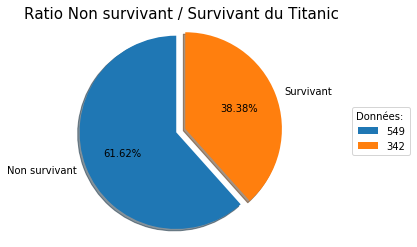

In [13]:
#On visualise les informations que l'on vient d'obtenir
labels = 'Non survivant', 'Survivant'
sizes = [61.61, 38.38]
explode = (0, 0.1) #on coupe la partie Survecue de Non survecue

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')  

plt.title('Ratio Non survivant / Survivant du Titanic', size = 15, y = 0.99)
plt.legend(title = "Données: ", labels = train['Survived'].value_counts(), loc = "center right", bbox_to_anchor=(0.5, 0, 0.7, 1))

#### - L'attribut Pclass

- Les passagers du Titanic ont voyagé en 3 classes. La plupart des passagers ont voyage dans la classe 3. Le nombre de passagers dans la classe 3 dépassait le nombre de passagers de classe 1 et de classe 2.
- Il y avait plus de chance de survivre si la classe était plus élevé.

In [14]:
#Nombre de passagers repartis par classes
train['Pclass'].value_counts(sort = False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

Text(0.5, 0.99, 'Passagers par classes')

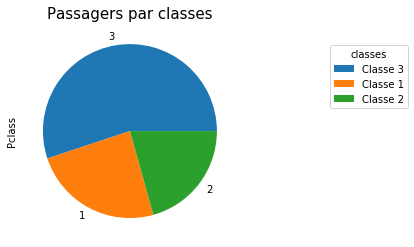

In [15]:
#On visualise l'information précédente
fig = train.Pclass.value_counts().plot.pie().legend(labels=['Classe 3','Classe 1','Classe 2'],loc='center right', bbox_to_anchor=(1.8, 0.75)).set_title("classes")
plt.title('Passagers par classes', size = 15, y = 0.99)

In [16]:
#Passagers repartis par classes en pourcent
train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.05, 'Survivants par classes')

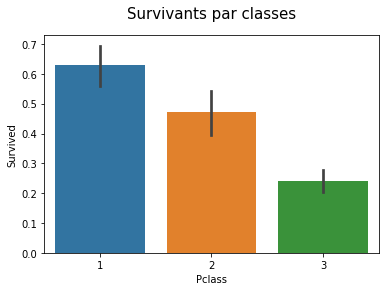

In [17]:
#On visualise l'information précédente
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.title('Survivants par classes', size = 15, y = 1.05)

Text(0, 0.5, 'Probabilité de survivre')

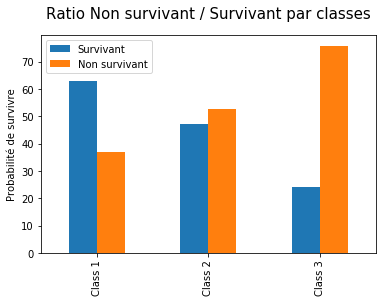

In [18]:
#Pourcentage des personnes survecues/non survecues reparties par classes
pclass1 = round((train[train.Pclass == 1].Survived == 1).value_counts()[1]/len(train[train.Pclass == 1]) * 100, 2)
pclass2 = round((train[train.Pclass == 2].Survived == 1).value_counts()[1]/len(train[train.Pclass == 2]) * 100, 2)
pclass3 = round((train[train.Pclass == 3].Survived == 1).value_counts()[1]/len(train[train.Pclass == 3]) * 100, 2)
pclass = pd.DataFrame({"Survivant" : {"Class 1": pclass1,"Class 2": pclass2, "Class 3": pclass3},  
                       "Non survivant" : {"Class 1": 100-pclass1, "Class 2": 100-pclass2, "Class 3": 100-pclass3}})
pclass.plot.bar().set_title("Ratio Non survivant / Survivant par classes", size = 15, y = 1.05)
plt.ylabel('Probabilité de survivre')

#### - L'attribut Sexe

- A peu près 65% de touristes étaient des hommes et 35% des femmes.
- Cependant le pourcentage des femmes survecues est plus élevées que celui des hommes. 
  Plus de 80% d'hommes ne sont pas survecus et 70% parmi les femmes


In [19]:
#Le nombre de hommes/femmes présents à bord du Titanic
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
#Hommes/femmes présents à bord du Titanic en pourcent
train.Sex.value_counts(normalize = True)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

Text(0.5, 1.05, 'Ratio femmes/hommes (pourcentage)')

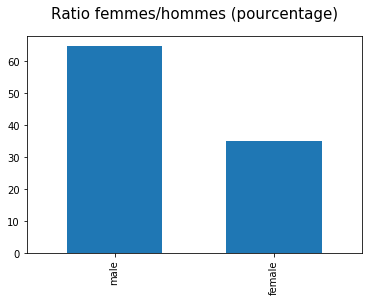

In [21]:
#On visualise l'information précédente
fig_sex = (train.Sex.value_counts(normalize = True) * 100).plot.bar(width=0.6)
plt.title('Ratio femmes/hommes (pourcentage)', size = 15, y = 1.05)

In [22]:
#Part de femmes/hommes survecus 
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### - L'attribut Age

- Le plus jeune voyageur avait moins de 5 mois seulement alors le plus agé avait 80 ans.
- L'age moyen du voyageur était légèrement inférieur à 30 ans
- La plupart des enfants dont l'age est inférieur à 10 ans ont survecus.
- Dans toutes autres tranches d'age le nombre de passagers non survecus étaient plus élevés que survecus.
- On peut également remarquer que plus de 140 personnes ont décédées agées entre 20 et 30 ans.

In [23]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.05, 'Personnes survecues/non survecus reparties par age')

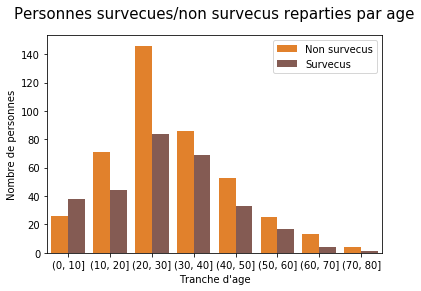

In [24]:
train
train['Age_Tranche'] = pd.cut(train.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x = "Age_Tranche", hue = "Survived", data = train, palette=["C1", "C5"]).legend(labels = ["Non survecus", "Survecus"])
plt.xlabel("Tranche d'age")
plt.ylabel('Nombre de personnes')
plt.title('Personnes survecues/non survecus reparties par age', size = 15, y = 1.05)

#### - L'attribut SibSp 

- Seulement 8 personnes voyageait avec leur frère/soeur/conjoint.

In [25]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

#### - L'attribut Parch

- Au plus 6 parents/enfants voyageaient ensemble
- 

In [27]:
train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

#### - L'attribut Fare

- En découpant le billet en 4 tarifs différents on peut remarquer qu'il y a un lien entre le tarif du billet et la chance 
  de survivre ou non. Plus le passager a acheté le billet qui coute cher plus il avait la chance de survivre.

In [29]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.05, 'Personnes survecues/non survecus reparties par catégorie de billet')

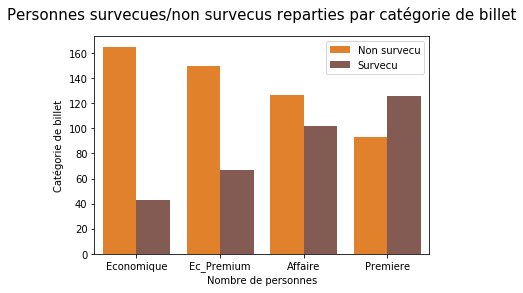

In [30]:
#On se basant sur l'information obtenue ci-dessus, on découpe le tarif du ticket en 4 classes
#On a pris les classes suivantes : Economique, Ec_Premium, Affaire, Premiere
train['F_Cat'] = pd.cut(train['Fare'], bins=[0, 7.91, 14.45, 31, 512.32], labels=['Economique','Ec_Premium','Affaire','Premiere'])
x = sns.countplot(x = "F_Cat", hue = "Survived", data = train, palette=["C1", "C5"]).legend(labels = ["Non survecu", "Survecu"])
plt.xlabel('Nombre de personnes')
plt.ylabel('Catégorie de billet')
plt.title('Personnes survecues/non survecus reparties par catégorie de billet', size = 15, y = 1.05)

#### - L'attribut Embarked

- La plupart des passagers ont embarqué à Southampton et la minorité à Queenstown.
- Les pesonnes qui se sont embarquées à Cherbourg avaient plus de chance de survivre que celles des deux autres villes.

In [31]:
#Le nombre de personnes embarquées à bord de Titanic à Cherbourg, Queenstown etSouthampton
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
#Personnes embarquées à bord de Titanic à Cherbourg, Queenstown et Southampton en pourcent
train.Embarked.value_counts(normalize = True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

Text(0.5, 1.05, 'Ratio Non survivant / Survivant par ville dembarquement')

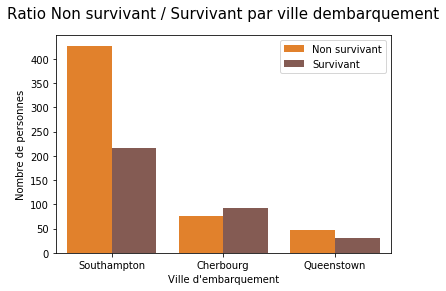

In [33]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = train, palette=["C1", "C5"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Non survivant", "Survivant"])
plt.xlabel("Ville d'embarquement")
plt.ylabel('Nombre de personnes')
plt.title("Ratio Non survivant / Survivant par ville dembarquement", size = 15, y = 1.05)

# 5.Préprocessing

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Tranche,F_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",Economique
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",Premiere
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",Ec_Premium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",Premiere
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",Ec_Premium


In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age_Tranche    177
Age            177
F_Cat           18
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [40]:
test.isnull().sum().sort_values(ascending = False)

Age         86
Embarked     0
Sex          0
Pclass       0
dtype: int64

In [43]:
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin", "Fare", "SibSp", "Parch"], axis = 1)
test = test.drop(["PassengerId", "Name", "Ticket", "Cabin", "Fare", "SibSp", "Parch"], axis = 1)

In [44]:
train.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [45]:
test.head()

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S


In [46]:
train['Embarked'].fillna(train['Embarked'].dropna().mode()[0], inplace = True)

In [47]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()

colonne = ['Sex', 'Embarked']

for i in colonne:
    train[i] = lab.fit_transform(train[i])
    test[i] = lab.transform(test[i])
    

In [48]:
train.fillna(value = {'Age' : train['Age'].mean()}, inplace = True)
test.fillna(value = {'Age' : test['Age'].mean()}, inplace = True)

In [49]:
train.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [50]:
train.isnull().sum().sort_values(ascending = False)

Embarked    0
Age         0
Sex         0
Pclass      0
Survived    0
dtype: int64

In [297]:
train['Age'] = train['Age'].astype('int') #On remplace float de Age par int

In [298]:
train.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22,2
1,1,1,0,38,0
2,1,3,0,26,2
3,1,1,0,35,2
4,0,3,1,35,2


In [299]:
train.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22,2
1,1,1,0,38,0
2,1,3,0,26,2
3,1,1,0,35,2
4,0,3,1,35,2


In [300]:
train.isnull().sum().sort_values(ascending = False)

Embarked    0
Age         0
Sex         0
Pclass      0
Survived    0
dtype: int64

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   Embarked  891 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 24.5 KB


# 6. Analyse Prédictive

In [302]:
def cross_val_model(model, x, y):#____trg  doesnt work?
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def accuracy_model(model, x_train, y_train, x_test):
    model.fit(x_train,y_train)
    y_test=model.predict(x_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)

def accuracy_model_bis(model, x_train, y_train, x_test):
    print(model)
    model.fit(x_train, y_train)
    y_test = model.predict(x_test)
    resultat = round(model.score(x_train, y_train)*100, 3)
    print('Accuracy : ',resultat)
    print()
    return resultat 

def crossValScore_mean(model, cv):#____trg,adding, still testing
    n = cv
    m = model
    cvs = cross_val_score(m, x_train, y_train, n, scoring='accuracy')
    res = cvs.mean()
    print('crossVal moyenne:', res)
    return res

In [303]:
x_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

x_test = test

In [304]:
models = [RandomForestClassifier(), LogisticRegression(), LinearRegression()]
for model in models : 
    accuracy_model_bis(model, x_train, y_train, x_test)
    #crossValScore_mean(model, 5)

RandomForestClassifier()
Accuracy :  89.787

LogisticRegression()
Accuracy :  79.012

LinearRegression()
Accuracy :  38.788



## Cross validation

In [305]:
from sklearn.model_selection import cross_val_score

### *Modèle RandomForestClassifier*

In [306]:
cross_RFC = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=5, scoring='accuracy')
round(cross_RFC.mean(), 3)

0.801

### *LogisticRegression*

In [307]:
cross_LogR = cross_val_score(LogisticRegression(), x_train, y_train, cv=5, scoring='accuracy')
round(cross_LogR.mean(), 3)

0.787

### *LinearRegression*

In [308]:
#cross_LinR = cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='accuracy')
#round(cross_LinR.mean(), 3)

## Récapitulatif des résultats

|  Modèles | Accuracy  | Moyenne CrossVal  |
|---|---|---|
|  RandomForestClassifier | 89.787  | 0.8  |
| LogisticRegression  | 79.012  | 0.787  |
|  LinearRegression | 38.788  |   |